# Задание 1 

Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на точность классификации или на вероятность ошибочной классификации в примере крестики-нолики и примере о спаме e-mail сообщений.

## Библиотеки

In [1]:
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt

## Крестики-нолики

Обучающее множество: Tic Tac Toe (крестики-нолики)
"x" начинает первым. Цель: "победа x"
Признаки (категориальные – 3 значения):
1. top-left-square: {x,o,b} 
2. top-middle-square: {x,o,b} 
3. top-right-square: {x,o,b} 
4. middle-left-square: {x,o,b} 
5. middle-middle-square: {x,o,b} 
6. middle-right-square: {x,o,b} 
7. bottom-left-square: {x,o,b} 
8. bottom-middle-square: {x,o,b} 
9. bottom-right-square: {x,o,b}

3 класса: {positive,negative}


In [2]:
with open("Tic_tac_toe.txt", "r") as file:
    lines = file.readlines()

# Создание списка признаков и меток
features = []
labels = []
for line in lines:
    data = line.strip().split(",") 
    features.append(data[:-1])
    labels.append(data[-1])

char_to_int = {"x": 0, "o": 1, "b": 2}
features_numeric = [[char_to_int[char] for char in row] for row in features]

for test_size in range(1, 10):
    test_size /= 10
    X_train, X_test, y_train, y_test = train_test_split(features_numeric, labels, test_size=test_size, random_state=12345)

    model = CategoricalNB()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f"Точность модели для тестовой выборки {int(test_size*100)}% от всего набора данных: {accuracy}")

# # Построение матрицы ошибок
# conf_matrix = confusion_matrix(y_test, predictions)

# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
#             xticklabels=["Negative", "Positive"],
#             yticklabels=["Negative", "Positive"])
# plt.xlabel('Предсказанные значения')
# plt.ylabel('Фактические значения')
# plt.title('Матрица ошибок')
# plt.show()

Точность модели для тестовой выборки 10% от всего набора данных: 0.71875
Точность модели для тестовой выборки 20% от всего набора данных: 0.6927083333333334
Точность модели для тестовой выборки 30% от всего набора данных: 0.6875
Точность модели для тестовой выборки 40% от всего набора данных: 0.6614583333333334
Точность модели для тестовой выборки 50% от всего набора данных: 0.6910229645093946
Точность модели для тестовой выборки 60% от всего набора данных: 0.6852173913043478
Точность модели для тестовой выборки 70% от всего набора данных: 0.6944858420268256
Точность модели для тестовой выборки 80% от всего набора данных: 0.6857887874837028
Точность модели для тестовой выборки 90% от всего набора данных: 0.6628041714947857


## Спам

Обучающее множество: Данные о спаме e-mail сообщений
Данные собраны Hewlett-Packard Labs, которая классифицировала 4601 e-mail сообщений как спам или не спам. 57 признаков, содержащих частоты определенных слов, соответствующих названию признака и букв в сообщениях. Данные содержат 2788 e-mail сообщений, классифицируемых как "не спам" (0) and 1813 сообщений, классифицируемых как "спам" (1). Часть признаков – частоты определенных слов, соответствующих названию признака. Часть признаков связана с числом заглавных букв в письме. 


In [3]:
# Загрузка встроенного набора данных Spambase
data = fetch_openml(data_id=44)

df = pd.DataFrame(data.data, columns=data.feature_names)
df['label'] = data.target

X = df.drop(columns=["label"])  # Признаки
y = df["label"]  # Метки классов

for test_size in range(20, 201, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=12345)

    model = MultinomialNB()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f"Точность модели для тестовой выборки {test_size} элементов от всего набора данных: {accuracy}")

# # Построение матрицы ошибок
# conf_matrix = confusion_matrix(y_test, predictions)

# # Визуализация теплокарты матрицы ошибок
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
#             xticklabels=["Не спам", "Спам"],
#             yticklabels=["Не спам", "Спам"])
# plt.xlabel('Предсказанные значения')
# plt.ylabel('Фактические значения')
# plt.title('Матрица ошибок')
# plt.show()

/usr/local/Cellar/jupyterlab/3.6.1/libexec/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Точность модели для тестовой выборки 20 элементов от всего набора данных: 0.7
Точность модели для тестовой выборки 40 элементов от всего набора данных: 0.75
Точность модели для тестовой выборки 60 элементов от всего набора данных: 0.7333333333333333
Точность модели для тестовой выборки 80 элементов от всего набора данных: 0.6875
Точность модели для тестовой выборки 100 элементов от всего набора данных: 0.71
Точность модели для тестовой выборки 120 элементов от всего набора данных: 0.7333333333333333
Точность модели для тестовой выборки 140 элементов от всего набора данных: 0.7428571428571429
Точность модели для тестовой выборки 160 элементов от всего набора данных: 0.75625
Точность модели для тестовой выборки 180 элементов от всего набора данных: 0.7555555555555555
Точность модели для тестовой выборки 200 элементов от всего набора данных: 0.75


# Задание 2

Сгенерируйте 100 точек с двумя признаками X1 и X2 в соответствии с нормальным распределением так, что первые 50 точек (class -1) имеют параметры: мат. ожидание X1  равно 10, мат. ожидание X2 равно 14, среднеквадратические отклонения для обеих переменных равны 4. Вторые 50 точек (class +1) имеют параметры: мат. ожидание X1 равно 20, мат. ожидание X2 равно 18, среднеквадратические отклонения для обеих переменных равны 3. Построить соответствующие диаграммы, иллюстрирующие данные. Построить байесовский классификатор и оценить качество классификации. 

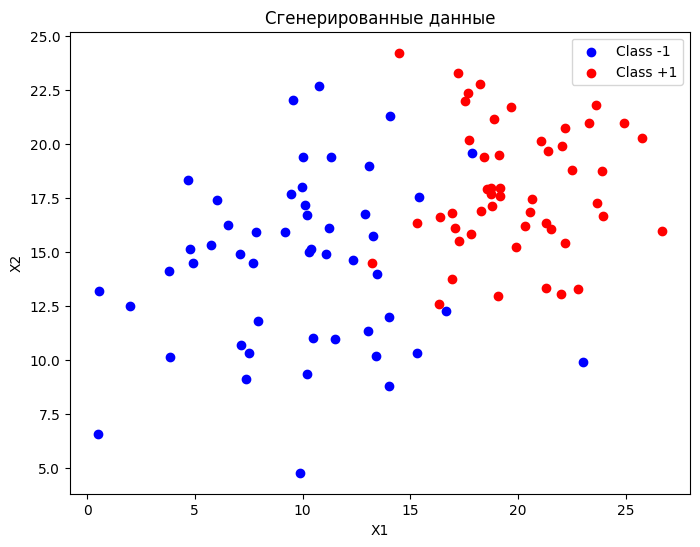

In [4]:
# Генерация данных
np.random.seed(12345)
mean1, mean2 = [10, 14], [20, 18]
std_dev1, std_dev2 = 4, 3

class1_points = np.random.normal(mean1, std_dev1, size=(50, 2))
class2_points = np.random.normal(mean2, std_dev2, size=(50, 2))

plt.figure(figsize=(8, 6))
plt.scatter(class1_points[:, 0], class1_points[:, 1], color='b', label='Class -1')
plt.scatter(class2_points[:, 0], class2_points[:, 1], color='r', label='Class +1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title('Сгенерированные данные')
plt.show()

In [5]:
X = np.vstack((class1_points, class2_points))
y = np.hstack((np.full(50, -1), np.full(50, 1)))

for test_size in range(1, 10):
    test_size /= 10
    X_train, X_test, y_train, y_test = train_test_split(features_numeric, labels, test_size=test_size, random_state=12345)

    classifier = GaussianNB()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f"Точность модели для тестовой выборки {int(test_size*100)}% от всего набора данных: {accuracy}")

Точность модели для тестовой выборки 10% от всего набора данных: 0.65625
Точность модели для тестовой выборки 20% от всего набора данных: 0.6666666666666666
Точность модели для тестовой выборки 30% от всего набора данных: 0.7083333333333334
Точность модели для тестовой выборки 40% от всего набора данных: 0.6848958333333334
Точность модели для тестовой выборки 50% от всего набора данных: 0.6576200417536534
Точность модели для тестовой выборки 60% от всего набора данных: 0.6504347826086957
Точность модели для тестовой выборки 70% от всего набора данных: 0.6482861400894188
Точность модели для тестовой выборки 80% от всего набора данных: 0.6323337679269883
Точность модели для тестовой выборки 90% от всего набора данных: 0.626882966396292


# Задание 3

Разработать байесовский классификатор для данных Титаник (Titanic dataset)

Исходные обучающие данные для классификации – в файле Titanic_train.csv

Данные для тестирования – в файле Titanic_test.csv

Использовать функцию read.csv для чтения данных из csv-файлов.

Классы:
survival        Выжил  (0 = No; 1 = Yes)

Признаки:
pclass         Класс каюты  (1 = 1st; 2 = 2nd; 3 = 3rd)
name          Имя
sex             Пол
age             Возраст
sibsp           Число братьев-сестер/муж-жена на борту
parch          Число родителей/детей на борту
ticket          Номер билета
fare             Стоимость билета
cabin           Каюта
embarked    Порт посадки (C = Cherbourg; Q = Queenstown; S = Southampton)

Специальные отметки:
Pclass: 1st ~ Верхний; 2nd ~ Средний; 3rd ~ Нижний
Age – в годах; дробный, если возраст меньше одного года


In [6]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [7]:
# Подготовка данных
def preprocess_data(data):
    data.drop(columns=["Name", "Ticket", "Cabin", "PassengerId"], inplace=True)
    data["Age"].fillna(data["Age"].mean(), inplace=True)
    data["Fare"].fillna(data["Fare"].mean(), inplace=True)
    data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
    
    label_encoders = {}
    categorical_features = ["Sex", "Embarked"]
    for feature in categorical_features:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        label_encoders[feature] = le
    
    return data

In [8]:
train_data_preprocessed = preprocess_data(train_data)
X_train = train_data_preprocessed.drop(columns=["Survived"])

classifier = MultinomialNB()
classifier.fit(X_train, train_data_preprocessed["Survived"])

MultinomialNB()

In [9]:
test_data_preprocessed = preprocess_data(test_data)

predictions = classifier.predict(test_data_preprocessed)

In [10]:
survived_count = sum(predictions)
died_count = len(predictions) - survived_count

print("Количество выживших:", survived_count)
print("Количество погибших:", died_count)

Количество выживших: 116
Количество погибших: 302
